In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [113]:
data = pd.read_csv('nyc_taxi_trip_duration.csv')

In [114]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


Since Id is unique for each trip, it wont help in exploring or analyzing data

In [115]:
data.drop('id', axis=1, inplace=True)
data.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [116]:
data.shape

(729322, 10)

In [117]:
## This dataset contains data of 729322 trips

In [118]:
data.columns

Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration'],
      dtype='object')

In [119]:
len(data.columns)

10

In [120]:
data.dtypes

vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

Analyzing Numerical columns

In [121]:
data.dtypes[data.dtypes=='int64']

vendor_id          int64
passenger_count    int64
trip_duration      int64
dtype: object

Since Vendor Id and passenger count is categoircal, Converting them from int to categorical 

In [122]:
data.vendor_id = data.vendor_id.astype('category')
data.passenger_count = data.passenger_count.astype('category')

In [123]:
data.dtypes[data.dtypes=='int64']

trip_duration    int64
dtype: object

In [124]:
data.dtypes[data.dtypes=='float64']

pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
dtype: object

In [125]:
data.dtypes[data.dtypes=='object']

pickup_datetime       object
dropoff_datetime      object
store_and_fwd_flag    object
dtype: object

In [126]:
data[['pickup_datetime', 'dropoff_datetime', 'store_and_fwd_flag']].head()

,pickup_datetime,dropoff_datetime,store_and_fwd_flag
0,2016-02-29 16:40:21,2016-02-29 16:47:01,N
1,2016-03-11 23:35:37,2016-03-11 23:53:57,N
2,2016-02-21 17:59:33,2016-02-21 18:26:48,N
3,2016-01-05 09:44:31,2016-01-05 10:03:32,N
4,2016-02-17 06:42:23,2016-02-17 06:56:31,N


In [127]:
data.pickup_datetime = pd.to_datetime(data.pickup_datetime)
data.dropoff_datetime = pd.to_datetime(data.dropoff_datetime)

In [128]:
data.store_and_fwd_flag = 1 * (data.store_and_fwd_flag=='Y')

In [129]:
data.store_and_fwd_flag = data.store_and_fwd_flag.astype('category')

In [130]:
data.dtypes

vendor_id                   category
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count             category
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag          category
trip_duration                  int64
dtype: object

Checking consistency of trip duration

In [131]:
data['calculated_duration'] = (data.dropoff_datetime - data.pickup_datetime).apply(lambda x: x.total_seconds())
difference = data.loc[(np.abs(data.calculated_duration.values - data.trip_duration.values)>10)]
difference.shape

(0, 11)

In [132]:
difference = data.loc[(np.abs(data.calculated_duration.values - data.trip_duration.values)>5)]
difference.shape

(0, 11)

In [133]:
difference = data.loc[(np.abs(data.calculated_duration.values - data.trip_duration.values)>1)]
difference.shape

(0, 11)

It Seems that The duration given in the data is Very much accurate

Analyzing Numerical Columns values

In [134]:
data.loc[data.trip_duration==data.trip_duration.max()]

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,calculated_duration
21813,1,2016-01-05 00:19:42,2016-01-27 11:08:38,1,-73.78965,40.643559,-73.95681,40.773087,0,1939736,1939736.0


In [135]:
max_duration = data.trip_duration.max()
max_duration = max_duration/(60*60*24)
print(max_duration, 'days')

22.450648148148147 days


In [136]:
data.loc[data.trip_duration==data.trip_duration.min()]

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,calculated_duration
70318,2,2016-04-11 19:01:35,2016-04-11 19:01:36,1,-73.945999,40.792202,-73.947411,40.792740,0,1,1.0
95823,2,2016-01-03 16:55:44,2016-01-03 16:55:45,1,-73.975677,40.785488,-73.976372,40.785831,0,1,1.0
102646,1,2016-04-17 11:44:49,2016-04-17 11:44:50,1,-73.940384,40.786423,-73.940300,40.786373,0,1,1.0
119181,1,2016-01-09 00:28:55,2016-01-09 00:28:56,1,-73.861961,40.768559,-73.861961,40.768559,0,1,1.0
296874,1,2016-05-17 09:03:38,2016-05-17 09:03:39,1,-73.819893,40.740822,-73.819885,40.740822,0,1,1.0
312992,1,2016-03-07 16:12:28,2016-03-07 16:12:29,1,-73.980690,40.744419,-73.980690,40.744419,0,1,1.0
323299,1,2016-02-03 12:35:22,2016-02-03 12:35:23,1,-73.980560,40.754829,-73.980560,40.754829,0,1,1.0
398887,1,2016-04-30 00:28:45,2016-04-30 00:28:46,1,-73.789658,40.647003,-73.789658,40.647003,0,1,1.0
512833,2,2016-03-27 12:55:52,2016-03-27 12:55:53,2,-73.983154,40.767159,-73.983238,40.767097,0,1,1.0
533760,2,2016-02-22 00:40:25,2016-02-22 00:40:26,0,-73.987595,40.719997,-73.987595,40.720005,0,1,1.0


In [137]:
data.trip_duration.values.min()

1

We can see that maximum duration of a trip is roughly 22 days
We can also see that minimum duration is 1 sec which could mean that the passenger cancelled his/her trip quickly and it is 
also evident from the pickup and dropoff location, there is no change.

Range of pickup and dropoff longitude and lattitude

In [138]:
print('Range of pickup latitude is {} to {}'.format(data.pickup_latitude.min(), data.pickup_latitude.max()))
print('Range of dropoff latitude is {} to {}'.format(data.dropoff_latitude.min(), data.dropoff_latitude.max()))
print('Range of pickup longitude is {} to {}'.format(data.pickup_longitude.min(), data.pickup_longitude.max()))
print('Range of dropoff longitude is {} to {}'.format(data.dropoff_longitude.min(), data.dropoff_longitude.max()))

Range of pickup latitude is 34.71223449707032 to 51.88108444213867
Range of dropoff latitude is 32.1811408996582 to 43.92102813720703
Range of pickup longitude is -121.93334197998048 to -65.89738464355469
Range of dropoff longitude is -121.9333038330078 to -65.89738464355469


In [139]:
Numerical_variables = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']

In [140]:
def UVA_Numeric(data, j):
    
    plt.figure(figsize=(10, 10))
    
    Mean = data[j].mean()
    Median = data[j].median()
    std_dev = Mean-data[j].std(), Mean+data[j].std()
    rang_e = data[j].max()-data[j].min()
    skewness = data[j].skew()
    kurtosis = data[j].kurtosis()
    minimum = data[j].min()
    maximum = data[j].max()

    sns.kdeplot(data[j], shade=True)
    sns.scatterplot(x=[Mean], y=[0], color='red', label='Mean')
    sns.scatterplot(x=[Median], y=[0], color='blue', label='Median')
    sns.lineplot(x=std_dev, y=[0, 0], color='yellow', label='Standard_Deviation')
    sns.scatterplot(x=[minimum], y=[0], color='black', label='Minimum')
    sns.scatterplot(x=[maximum], y=[0], color='black', label='Maximum')
        
    plt.xlabel('{}'.format(j))
    plt.ylabel('density')
    plt.title('Mean  {}\nMedian  {}\nstandard_deviation {}, {}\nskewness  {}\nkurtosis  {}'.format(
    Mean, Median, std_dev[0], std_dev[1], skewness, kurtosis))
    plt.show()

Analysing the kde plot of the pickup locations, dropoff locations and durations

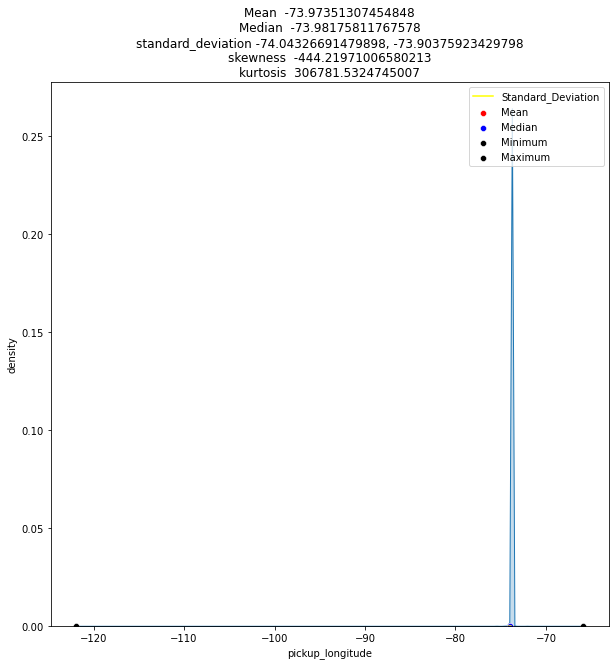

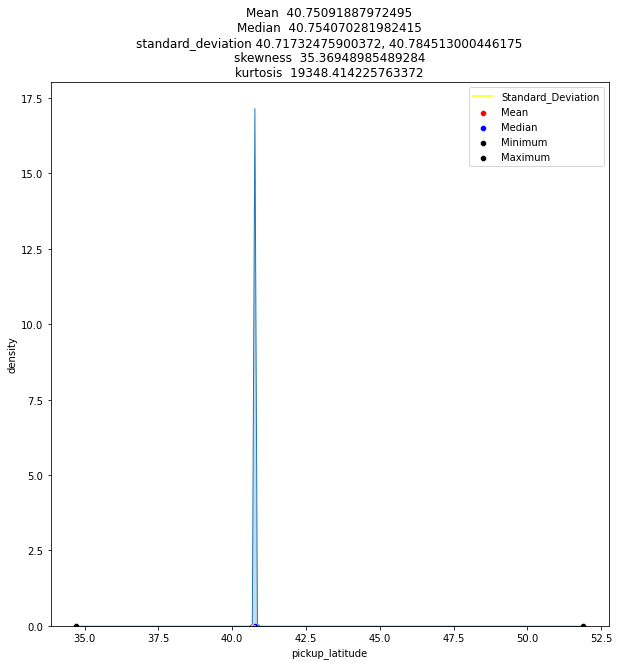

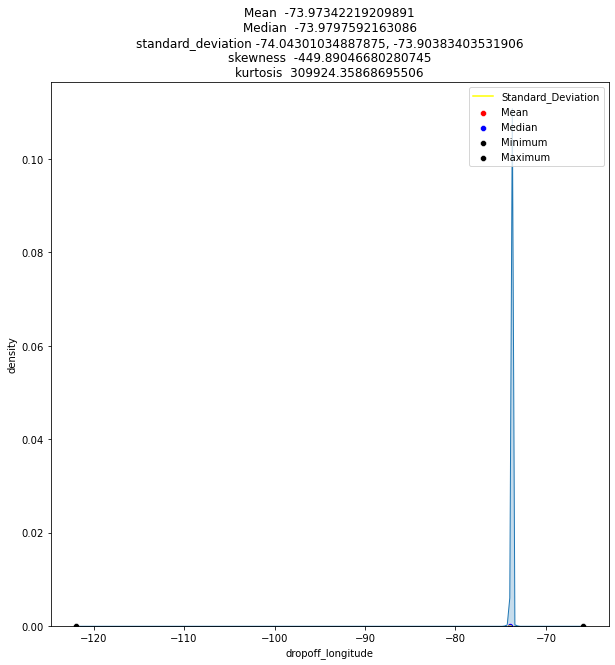

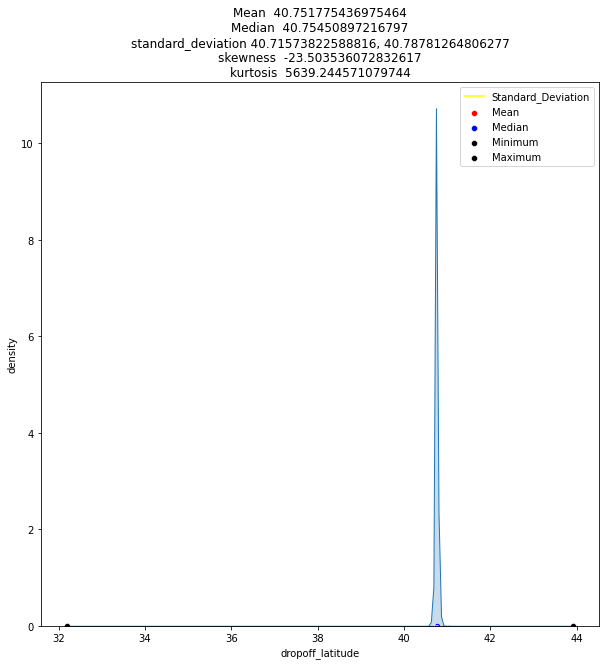

In [141]:
for i in Numerical_variables:
    UVA_Numeric(data, i)

Data present in the pickup and dropoff location is highly skewed, This indicates that a lot of outliers might be present in the data.

Let us take a look at the QQ plot to check for deviation from normal distribution

In [142]:
import statsmodels.api as sm
import pylab as py

import warnings
warnings.filterwarnings('ignore') 

In [143]:
def Quantile(data, j):
    plt.figure(figsize=(10, 10), dpi=100)
    sm.qqplot(data[j], line='s')
    py.show()
    plt.show()

<Figure size 1000x1000 with 0 Axes>

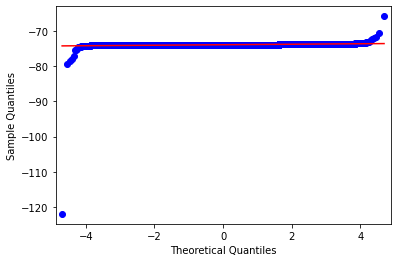

<Figure size 1000x1000 with 0 Axes>

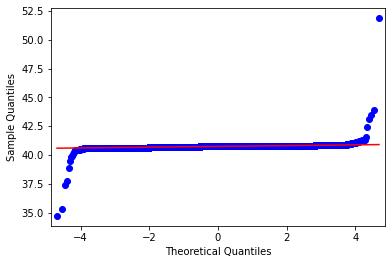

<Figure size 1000x1000 with 0 Axes>

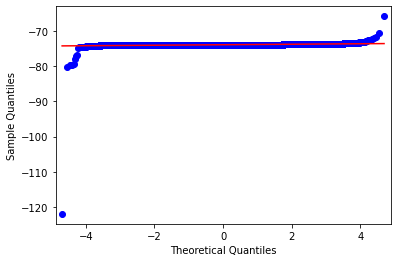

<Figure size 1000x1000 with 0 Axes>

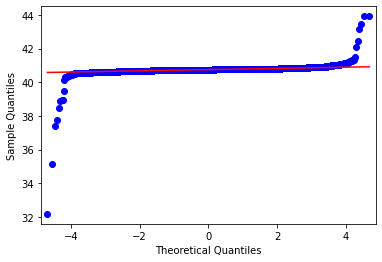

In [144]:
for i in Numerical_variables:
    Quantile(data, i)

The distribution is quite normal, however a lot of outliers are present. However, We need to take a closer look after removing outliers to check normality of data distribution.

Outlier Treatment

In [145]:
factor = 3
numeric = data[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']]

numeric=numeric.loc[(data.pickup_longitude>=(data.pickup_longitude.mean()-factor*data.pickup_longitude.std()))&(data.pickup_longitude<=(data.pickup_longitude.mean()+factor*data.pickup_longitude.std()))]
numeric=numeric.loc[(data.pickup_latitude>=(data.pickup_latitude.mean()-factor*data.pickup_latitude.std()))&(data.pickup_latitude<=(data.pickup_latitude.mean()+factor*data.pickup_latitude.std()))]
numeric=numeric.loc[(data.dropoff_longitude>=(data.dropoff_longitude.mean()-factor*data.dropoff_longitude.std()))&(data.dropoff_longitude<=(data.dropoff_longitude.mean()+factor*data.dropoff_longitude.std()))]
numeric=numeric.loc[(data.dropoff_latitude>=(data.dropoff_latitude.mean()-factor*data.dropoff_latitude.std()))&(data.dropoff_latitude<=(data.dropoff_latitude.mean()+factor*data.dropoff_latitude.std()))]

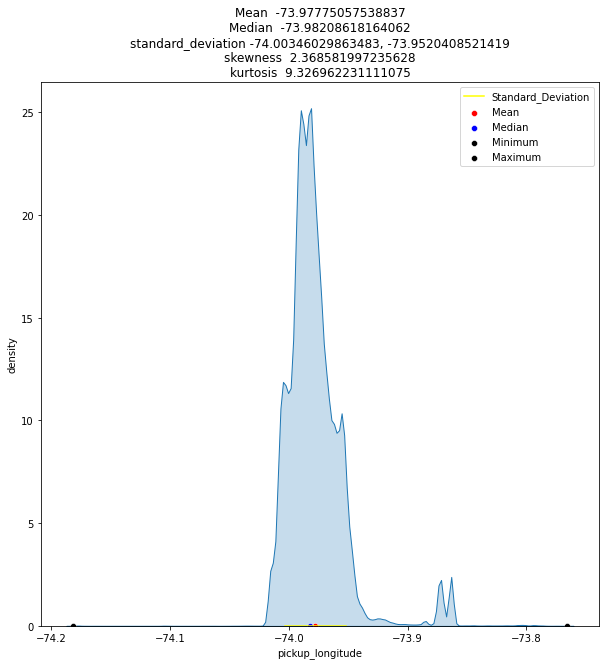

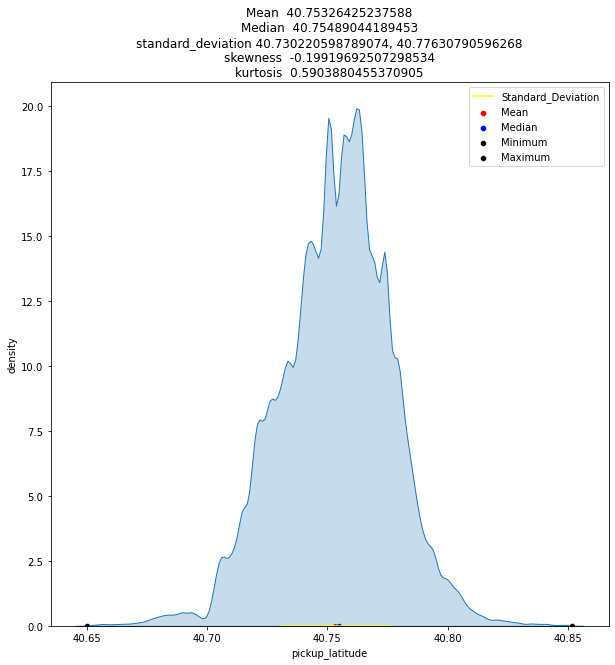

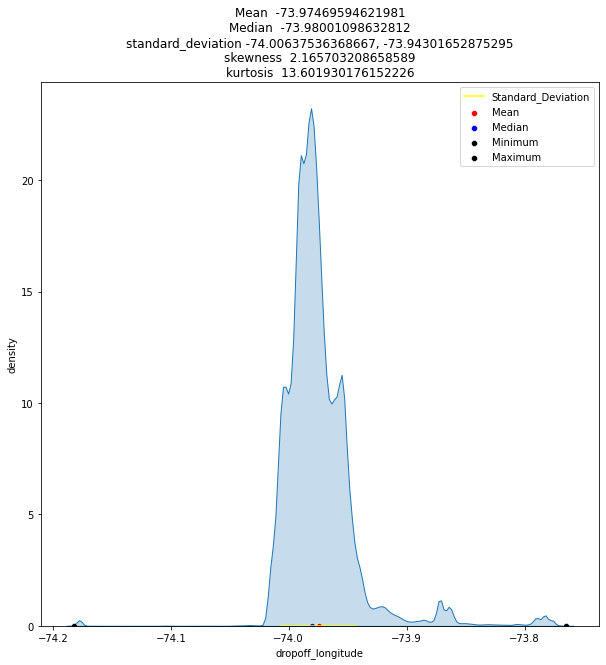

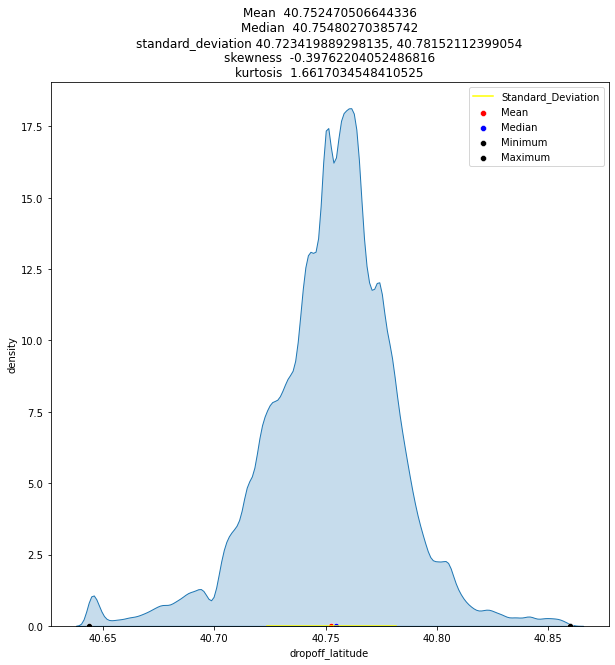

In [146]:
for i in Numerical_variables:
    UVA_Numeric(numeric, i)

<Figure size 1000x1000 with 0 Axes>

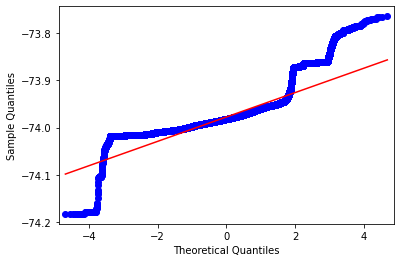

<Figure size 1000x1000 with 0 Axes>

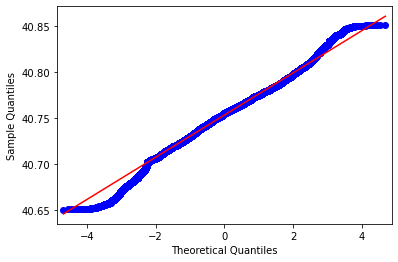

<Figure size 1000x1000 with 0 Axes>

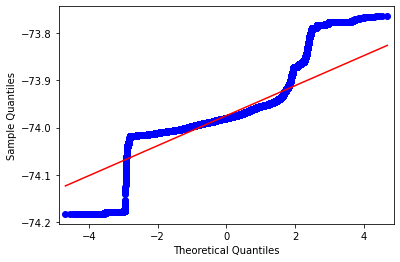

<Figure size 1000x1000 with 0 Axes>

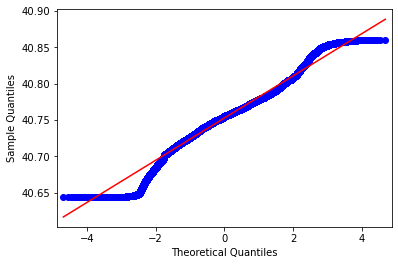

In [147]:
for i in Numerical_variables:
    Quantile(numeric, i)

From the quantile quantile plot it is clear that the data distribution is not normal

In [148]:
data.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,calculated_duration
0,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,0,400,400.0
1,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,0,1100,1100.0
2,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,0,1635,1635.0
3,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,0,1141,1141.0
4,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,0,848,848.0


Univariate Analysis of Categorical Variables

Passenger Count

In [149]:
data.passenger_count.value_counts()

1    517415
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
7         1
9         1
Name: passenger_count, dtype: int64

In [150]:
data.passenger_count.value_counts(normalize=True)

1    0.709447
2    0.144102
5    0.053373
3    0.040712
6    0.033054
4    0.019264
0    0.000045
7    0.000001
9    0.000001
Name: passenger_count, dtype: float64

We can see that 517415 trips had single passenger while only 1 trip has 9 passsenger, there are also trips with no passengers.

Let us take a look at the histograms and the probability of getting passenger count in a trip

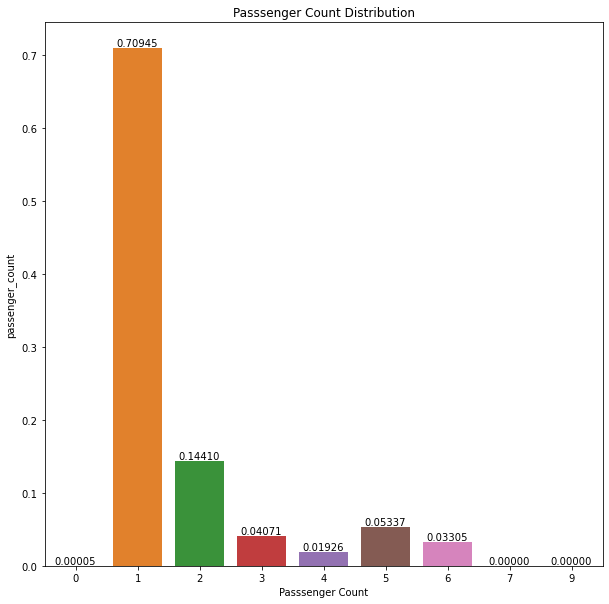

In [151]:
plt.figure(figsize=(10, 10))

ax = sns.barplot(x=data.passenger_count.value_counts().index, y=data.passenger_count.value_counts(normalize=True))
plt.title('Passsenger Count Distribution')
plt.xlabel('Passsenger Count')
for p in ax.patches:
    ax.annotate('{:1.5f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()), ha='center', va='bottom', color= 'black' )

Store_and_fwd_flag

In [152]:
data.store_and_fwd_flag.value_counts()

0    725282
1      4040
Name: store_and_fwd_flag, dtype: int64

In [153]:
data.store_and_fwd_flag.value_counts(normalize=True)

0    0.994461
1    0.005539
Name: store_and_fwd_flag, dtype: float64

We can see that 99 percent of the taxis did not have the information/data about the trip when it did not have connection with the server

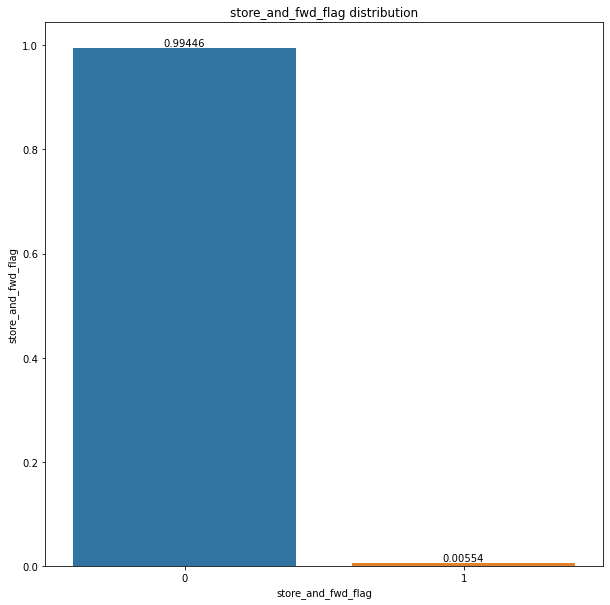

In [154]:
plt.figure(figsize=(10, 10))

ax = sns.barplot(x=data.store_and_fwd_flag.value_counts().index, y=data.store_and_fwd_flag.value_counts(normalize=True))
plt.title('store_and_fwd_flag distribution')
plt.xlabel('store_and_fwd_flag')
for p in ax.patches:
    ax.annotate('{:1.5f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()), ha='center', va='bottom', color= 'black' )

Vendor Id

In [155]:
data.vendor_id.value_counts()

2    390481
1    338841
Name: vendor_id, dtype: int64

In [156]:
data.vendor_id.value_counts(normalize=True)

2    0.535403
1    0.464597
Name: vendor_id, dtype: float64

Looks like there are only 2 providers of taxi service

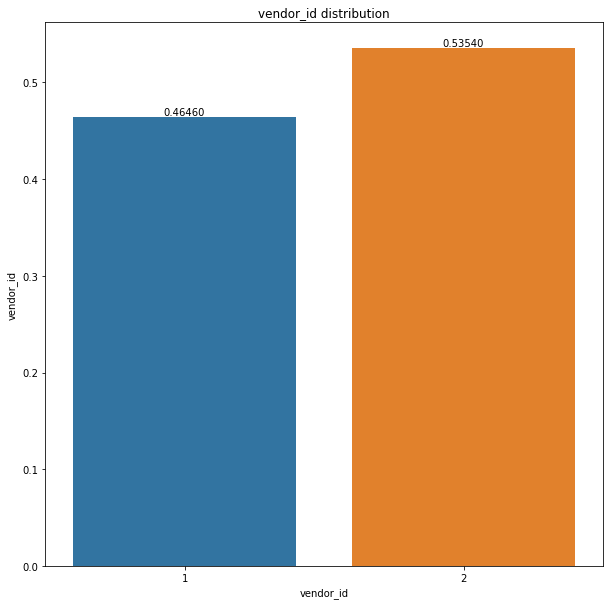

In [157]:
plt.figure(figsize=(10, 10))

ax = sns.barplot(x=data.vendor_id.value_counts().index, y=data.vendor_id.value_counts(normalize=True))
plt.title('vendor_id distribution')
plt.xlabel('vendor_id')
for p in ax.patches:
    ax.annotate('{:1.5f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()), ha='center', va='bottom', color= 'black' )

Do Taxis with higher passenger count have higher trip duration?

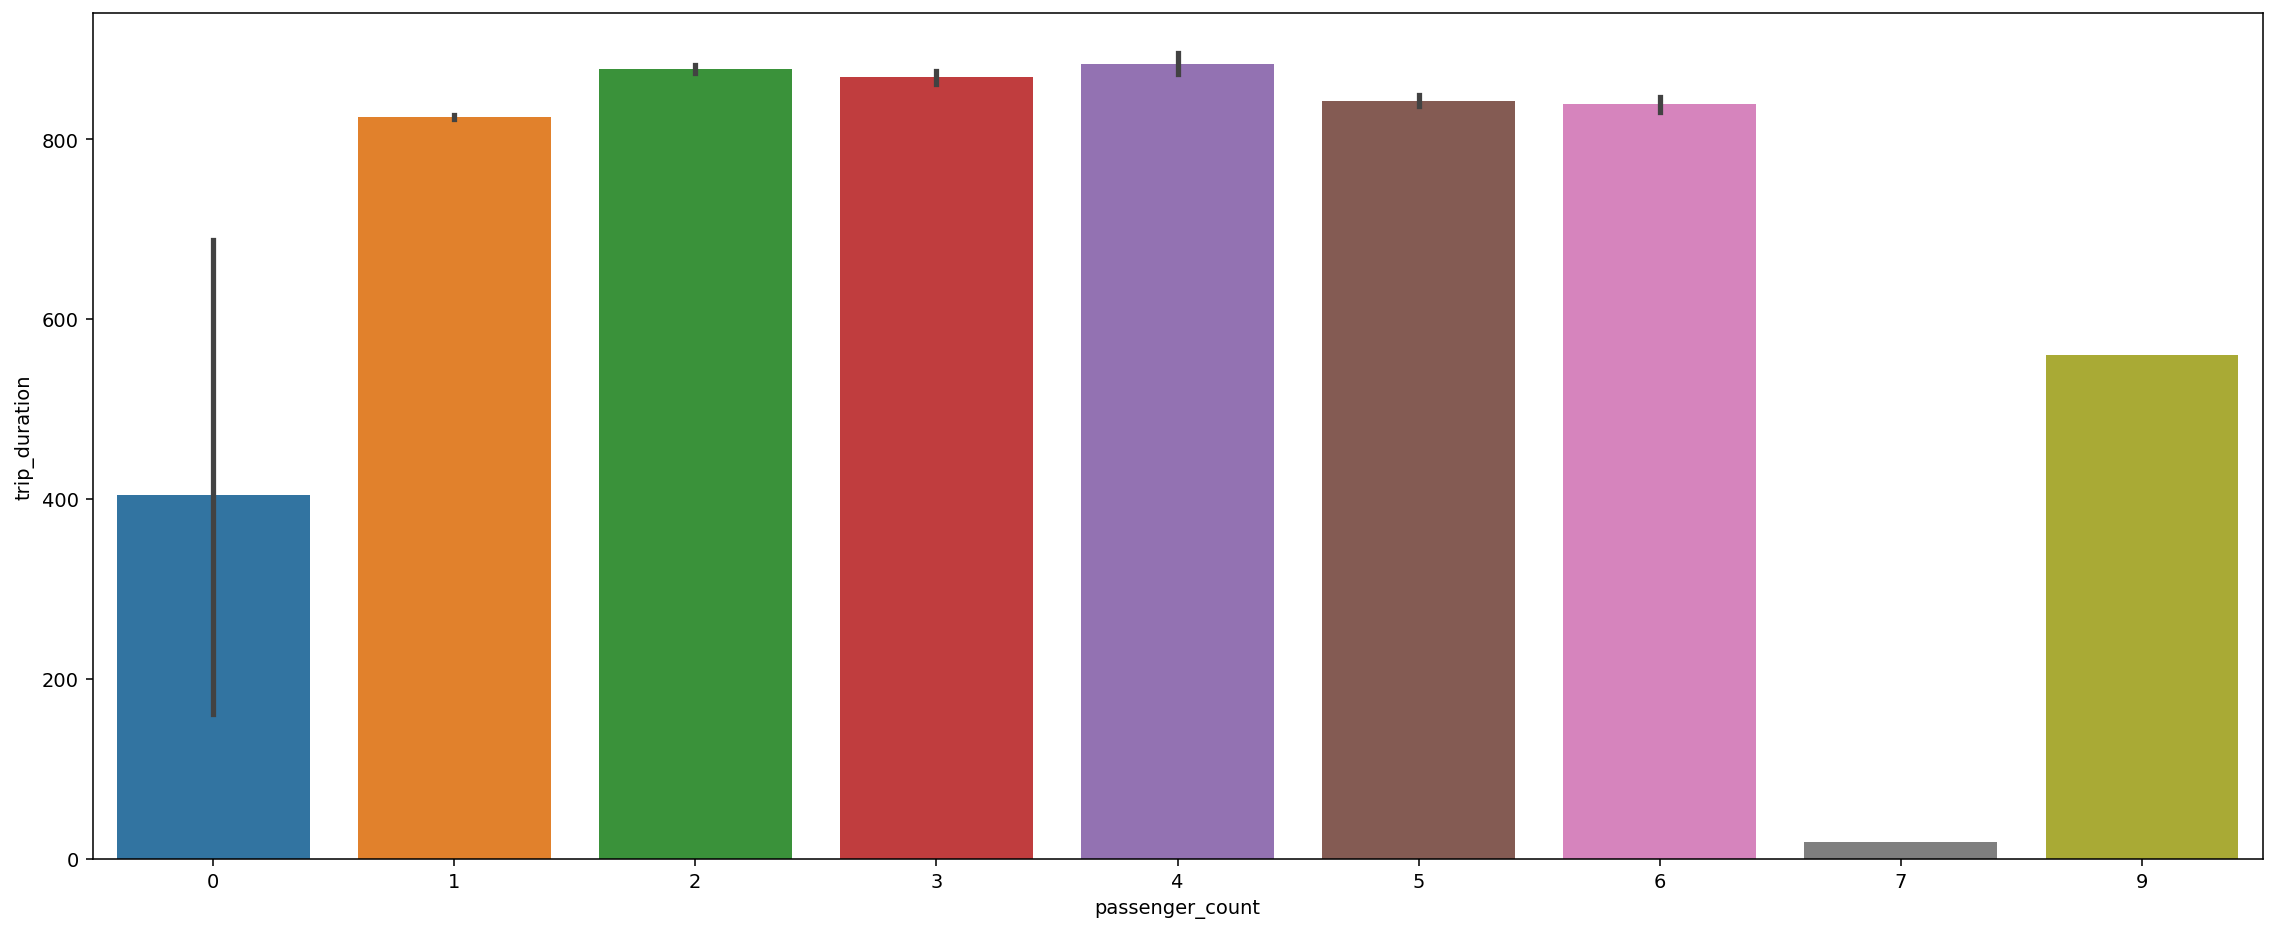

In [272]:
df = data.loc[data.trip_duration<10000]
plt.figure(figsize=(20, 8), dpi=140)
sns.barplot(x='passenger_count', y='trip_duration', data=df)
plt.show()

It can be seen that trips with lower passenger count also have higher trip duration. Infact, trips with passenger count 7<br>
have lower trip duration

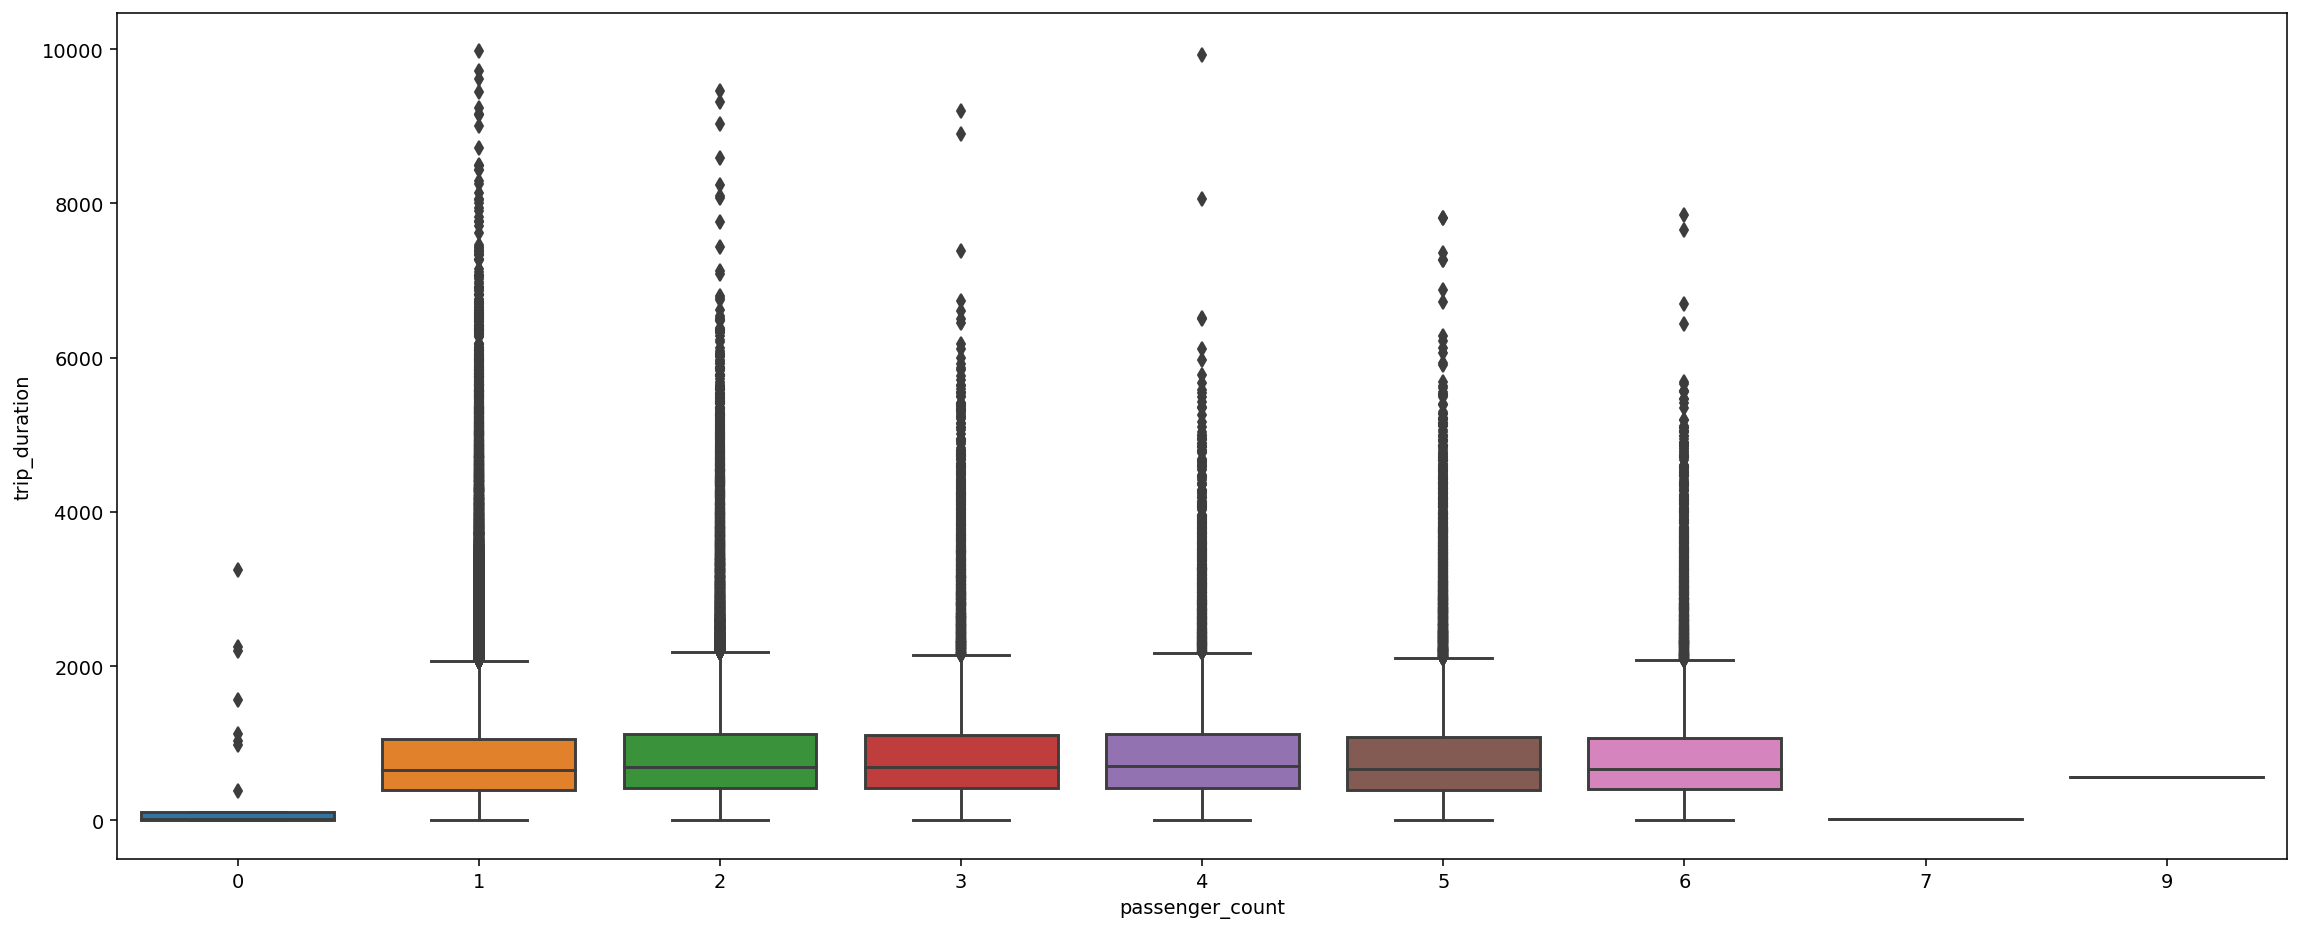

In [253]:
plt.figure(figsize=(20, 8), dpi=140)
df = data.loc[data.trip_duration<10000]
sns.boxplot(x='passenger_count', y='trip_duration', data=df)
plt.show()

Bivariate Analysis

Since the data is not normal and there are a lot of outliers present in the data, kendall-tau coefficient is appropriate for
checking correlation between variables

Text(0.5, 1.0, 'kendall')

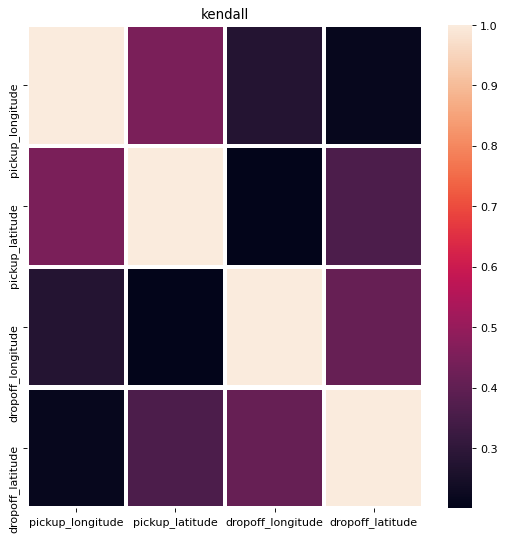

In [163]:
plt.figure(figsize=(8, 8), dpi=80)
numerical_data = data[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']]
corr=numerical_data.corr(method='kendall')
sns.heatmap(corr, linewidth=3)
plt.title('kendall')

In [164]:
c=numerical_data.corr(method='kendall').abs()
s=c.unstack()
so = s.sort_values(kind='quicksort', ascending=False)
so = pd.DataFrame(so, columns = ["kendall_tau_correlation"])
so.loc[so.kendall_tau_correlation<1, 'kendall_tau_correlation']

pickup_longitude   pickup_latitude      0.448515
pickup_latitude    pickup_longitude     0.448515
dropoff_longitude  dropoff_latitude     0.412505
dropoff_latitude   dropoff_longitude    0.412505
pickup_latitude    dropoff_latitude     0.362233
dropoff_latitude   pickup_latitude      0.362233
pickup_longitude   dropoff_longitude    0.276254
dropoff_longitude  pickup_longitude     0.276254
pickup_longitude   dropoff_latitude     0.214030
dropoff_latitude   pickup_longitude     0.214030
pickup_latitude    dropoff_longitude    0.200179
dropoff_longitude  pickup_latitude      0.200179
Name: kendall_tau_correlation, dtype: float64

From Heatmap and the table above we can see that, The following variables have strong relationship among themselves.
1)pickup_longitude   pickup_latitude
2)pickup_latitude    pickup_longitude
3)dropoff_longitude  dropoff_latitude
4)dropoff_latitude   dropoff_longitude

Hypothesis Testing

Hypothesis <br>
1)Do taxis with vendor id-1 have higher trip duration than those with vendor id-2? <br>
2)Do taxis with high passenger count have higher trip duration? <br>
3)Do taxis with higher trip duration not have a record of trip when the taxi had no connection with the server?

In [201]:
from numpy import sqrt, abs, round
from scipy.stats import norm
from scipy.stats import t as t_dist

In [202]:
def TwoSample_Ztest(x1, x2, sigma1, sigma2, n1, n2):
    over_sigma = sqrt(sigma1**2/n1+sigma2**2/n2)
    z = (x1-x2)/over_sigma
    p_value = 2*(1-norm.cdf(abs(z)))
    return p_value

In [209]:
def Bivariate_cont_cat(data, cont, cat, category1, category2):
    x1 = data[cont][data[cat]==category1]
    x2 = data[cont][data[cat]==category2]
    
    n1, n2 = x1.shape[0], x2.shape[0]
    print(n1, n2)
    m1, m2 = x1.mean(), x2.mean()
    sigma1, sigma2 = x1.std(), x2.std()
    z_pvalue = TwoSample_Ztest(m1, m2, sigma1, sigma2, n1, n2)
    table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc=np.mean)
    
    plt.figure(figsize=(6, 6), dpi=100)
    
    #barplot
    sns.barplot([str(category1), str(category2)], [m1, m2])
    plt.xlabel(cat)
    plt.ylabel('mean {}'.format(cont))
    plt.title('ztest pvalue - {:1.5}\n {}'.format(z_pvalue, table))
    
    

338841 390481


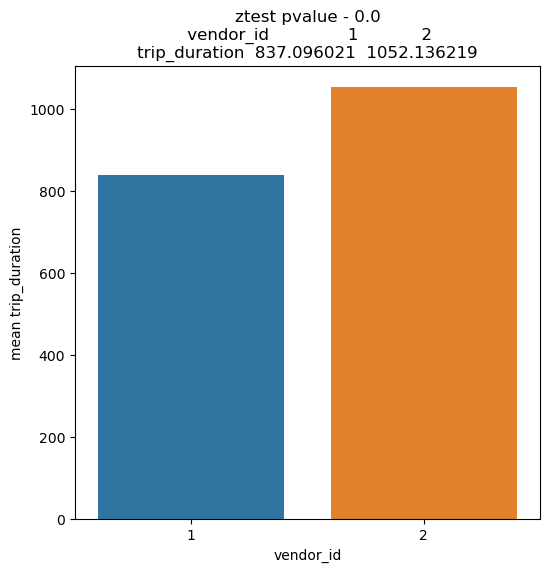

In [210]:
Bivariate_cont_cat(data, 'trip_duration', 'vendor_id', 1, 2)

From the ztest and barplot it is clear that vendor id 2 has more trip duration than vendor id 1 and we can reject our NULL hypothesis 

725282 4040


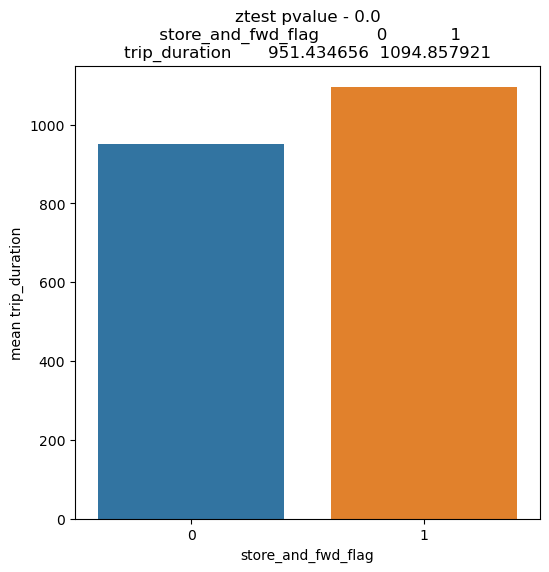

In [211]:
Bivariate_cont_cat(data, 'trip_duration', 'store_and_fwd_flag', 0, 1)

Here also we can see that those having higher trip duration had the record of the trip when it didnot have any connection with the server to later send it to the vendor, therefore we have enough evidence to reject null hypothesis as is clear from the z_testpvalue

In [273]:
data

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,calculated_duration
0,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,0,400,400.0
1,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,0,1100,1100.0
2,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,0,1635,1635.0
3,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,0,1141,1141.0
4,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,0,848,848.0
...,...,...,...,...,...,...,...,...,...,...,...
729317,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,0,296,296.0
729318,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,0,315,315.0
729319,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,0,673,673.0
729320,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,0,447,447.0


Does vendor with vendor id 2 have higher passenger_count than vendor 1?

In [291]:
def BVA_categorical(data, tar, cat):

    #isolating variables
    data2 = data.loc[:, [tar, cat]]
    
    #forming cross tab
    table = pd.crosstab(data2[tar], data2[cat])
    f_obs = np.array([table.iloc[0][:].values, table.iloc[1][:].values])
    
    ##ch2 test
    from scipy.stats import chi2_contingency
    chi, p, dof, expected = chi2_contingency(f_obs)
    
    if p < 0.05:
        sig = True
    else:
        sig = False
    
    sns.countplot(x=cat, hue=tar, data=data2)
    plt.title("p-value = {}\n difference significant? = {}\n".format(round(p,8),sig))
    
    #plotting stacked percentage barplot
    ax = data2.groupby(cat)[tar].value_counts(normalize=True).unstack()
    ax.plot(kind='bar', stacked=True, title=str(ax))

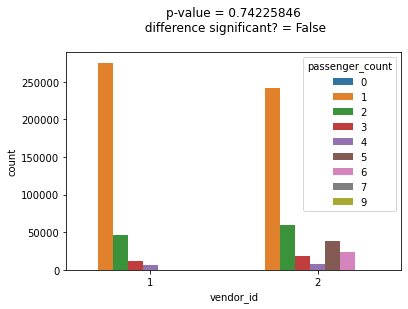

<Figure size 800x800 with 0 Axes>

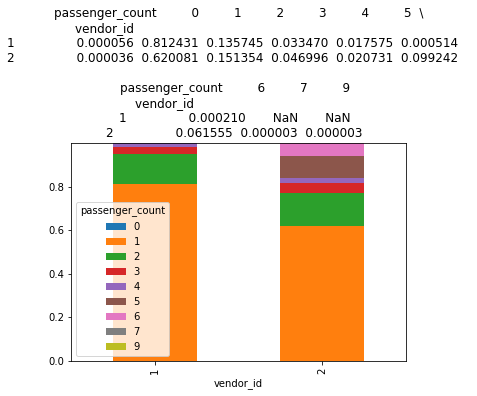

In [292]:
BVA_categorical(data, 'passenger_count', 'vendor_id')

From the above plot and pvalue, we dont have enough evidence to reject our NULL hypothesis.<br>
Therefore, vendor with vendor id 2 has higher passenger_count than vendor with vendor id 1